<a href="https://colab.research.google.com/github/Sudhir956020/Deep-Learning/blob/main/ANN_for_Regression_(House_price_Pridiction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
import os

In [4]:
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
pd.DataFrame(housing.data, columns= housing.feature_names)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
X =pd.DataFrame(housing.data, columns= housing.feature_names)

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y = pd.DataFrame(housing.target, columns=['target'])

In [21]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [22]:
X.shape

(20640, 8)

In [23]:
y.shape

(20640, 1)

In [24]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)

In [25]:
X_train_full.shape

(15480, 8)

In [26]:
X_test.shape

(5160, 8)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [29]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [30]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [33]:
model = tf.keras.models.Sequential(LAYERS)

In [31]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [34]:
  LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [36]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
EPOCHS = 10

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 8s 5ms/step - loss: 0.7604 - coeff_determination: 0.4081 - val_loss: 0.4663 - val_coeff_determination: 0.6230
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4443 - coeff_determination: 0.6513 - val_loss: 0.4613 - val_coeff_determination: 0.6079
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3960 - coeff_determination: 0.6866 - val_loss: 0.3665 - val_coeff_determination: 0.7006
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3825 - coeff_determination: 0.6978 - val_loss: 0.3884 - val_coeff_determination: 0.6749
Epoch 5/10
363/363 [==============================] - 2s 7ms/step - loss: 0.3772 - coeff_determination: 0.6995 - val_loss: 0.3892 - val_coeff_determination: 0.6707
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3707 - coeff_determination: 0.7052 - val_loss: 0.4060 - val_coeff_determination: 0.6554
Epoch 7/10
363/3

In [38]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.760433,0.408128,0.466266,0.623037
1,0.444291,0.651285,0.461310,0.607906
2,0.396033,0.686574,0.366528,0.700610
3,0.382519,0.697782,0.388357,0.674921
4,0.377198,0.699498,0.389198,0.670685
5,0.370712,0.705222,0.406001,0.655379
6,0.368707,0.700361,0.363451,0.698690
7,0.363477,0.713081,0.342841,0.719520
8,0.357528,0.714831,0.361235,0.704477
9,0.356896,0.714771,0.362840,0.695344


<Axes: >

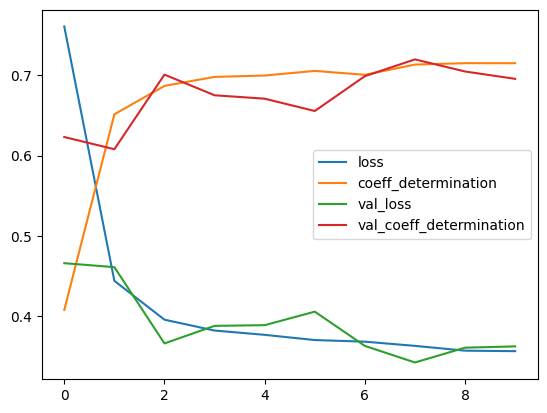

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3464 - coeff_determination: 0.7158


[0.34635627269744873, 0.7157907485961914]

In [41]:
new = X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [43]:
 new.shape

(8,)

In [44]:
new = new.reshape((1,8))

In [45]:
new.shape

(1, 8)

In [46]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7c4dd066cac0>>

In [47]:
model.predict(new)

1/1 [==============================] - 0s 349ms/step


array([[0.7871811]], dtype=float32)

In [48]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100
